In [108]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [109]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [110]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [111]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)

In [112]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [113]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [114]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [115]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [116]:
# Find the most recent date in the data set.
max_date_df = pd.read_sql("SELECT max(date) as max_date FROM measurement", conn)
max_date_df

,max_date
0,2017-08-23


In [117]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
max_date_var = max_date_df["max_date"][0]
date_1_yr_ago = dt.datetime.strptime(max_date_var, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = date_1_yr_ago.strftime('%Y-%m-%d')
#query_date
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prp_12_mth_df = pd.read_sql("SELECT date, prcp FROM measurement where date  >= '2016-08-23' order by date", conn)
prp_12_mth_df = prp_12_mth_df.set_index("date")
prp_12_mth_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


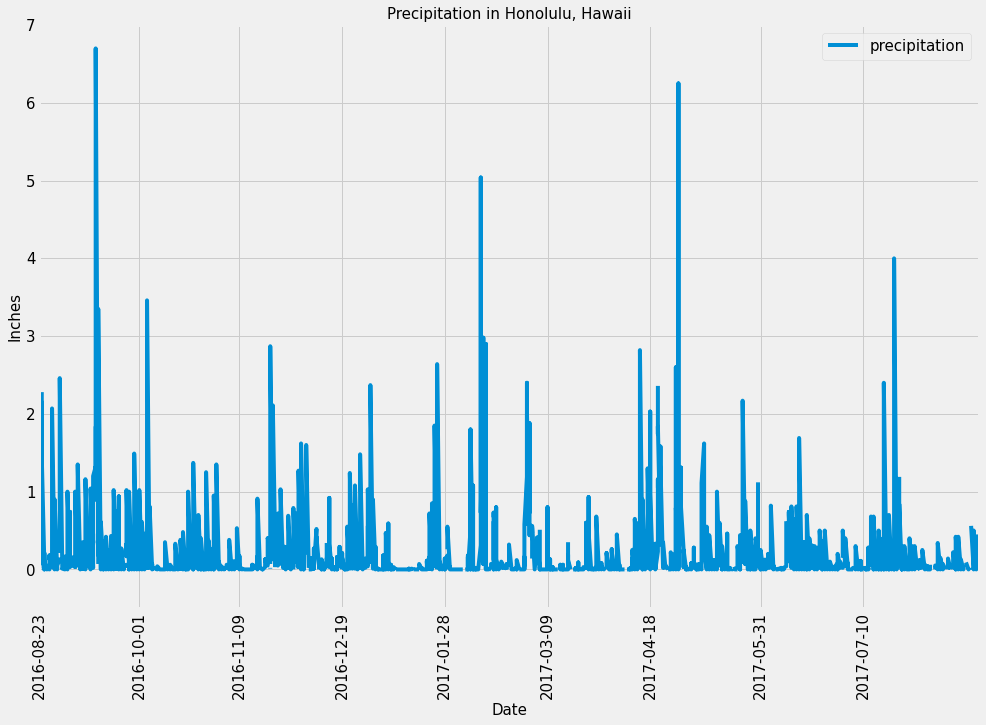

In [118]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15, 10))
plt.plot(prp_12_mth_df.index, prp_12_mth_df['prcp'])

# Add legned 
plt.legend(['precipitation'], loc="upper right",fontsize=15)
# set x location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

# Assign xticks
plt.xticks(xloc, rotation='vertical',fontsize=15)
# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title(f"Precipitation in Honolulu, Hawaii" ,fontsize=15)
plt.yticks(size=15)

# Asign xlim and ylim
plt.xlim(0,366)
plt.ylim(-0.5,7)
plt.savefig("./Images/Precipitation_Plot.png")

In [119]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prp_12_mth_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number stations in the dataset
no_of_stat = pd.read_sql("SELECT count(*) as total_no_of_station FROM station", conn)
no_of_stat

,total_no_of_station
0,9


In [121]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stat_df = pd.read_sql("SELECT station,count(*) as active_count FROM measurement group by station order by count(*) desc", conn)
display(active_stat_df)
#Answer the following question: which station id has the greatest number of observations?
print (active_stat_df["station"][0],"has highest no of observastion")

,station,active_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


USC00519281 has highest no of observastion


In [122]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_high_avg_df = pd.read_sql("SELECT min(tobs) as min_temp,max(tobs) as max_temp,avg(tobs) as avg_temp FROM measurement where station = 'USC00519281'", conn)
display(low_high_avg_df)

,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


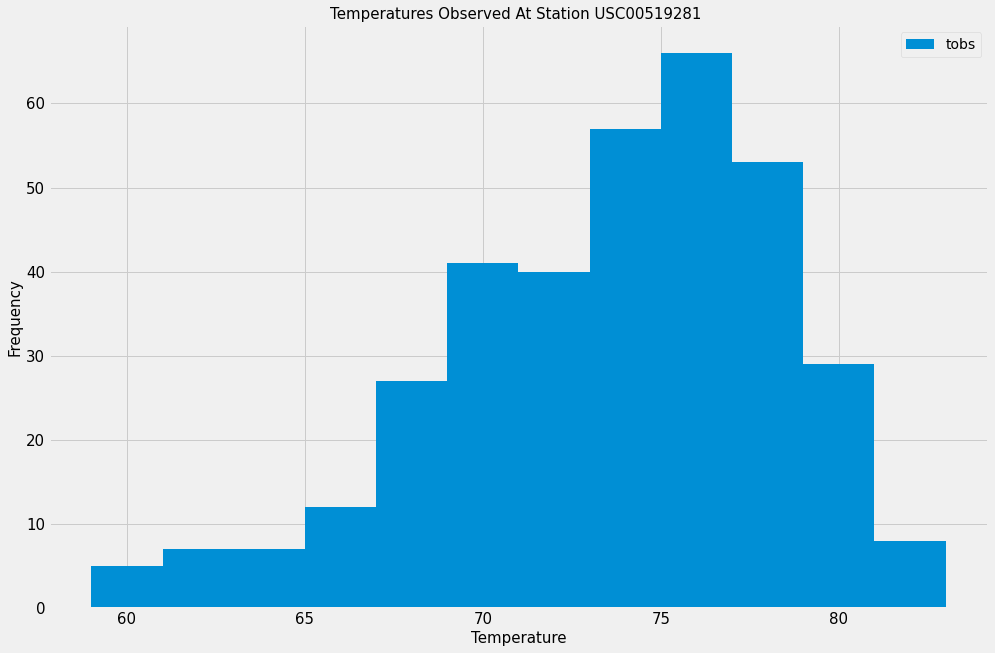

In [123]:
# Using the most active station id
#session.query(*sel).filter(Measurement.station == ste[0]).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
            filter(Measurement.date.between(query_date,max_date_var),\
                   Measurement.station == 'USC00519281').all()

# Plot the results as a histogram
plt.figure(figsize=(15,10))
plt.hist(np.ravel(results), bins=12)
plt.title('Temperatures Observed At Station USC00519281 ',fontsize=15)
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=15)
plt.xticks(size=15)

# Save Figure
plt.savefig("./Images/USC00519281_temperature_Plot.png")
# Show plot
plt.show()


# Close session

In [124]:
# Close Session
session.close()